In [1]:
from qiskit import *
# Version
print(qiskit.__qiskit_version__)
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit.tools.monitor import job_monitor
%matplotlib inline

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


In [ ]:
# API Token
from dotenv import load_dotenv
import os

load_dotenv()

API_TOKEN = os.getenv("IBM_API_TOKEN")

IBMQ.save_account(API_TOKEN, overwrite=True)

In [2]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

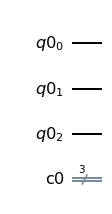

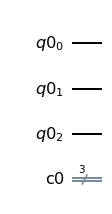

In [3]:
# 3 qubit quantum register
qr = QuantumRegister(3)
# 3 bit register
cr = ClassicalRegister(3)

# Circuit
circuit = QuantumCircuit(qr, cr)
circuit.draw(output='mpl')

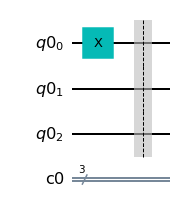

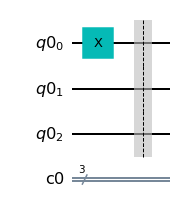

In [4]:
# Set value to q[0]
circuit.x(qr[0])
circuit.barrier()
circuit.draw(output='mpl')

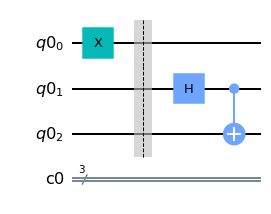

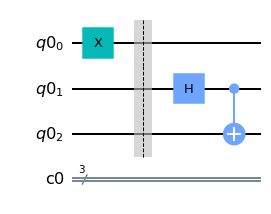

In [5]:
# Entangle
circuit.h(qr[1])
circuit.cx(qr[1], qr[2])
circuit.draw(output='mpl')

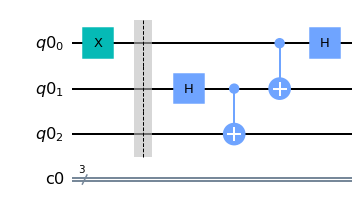

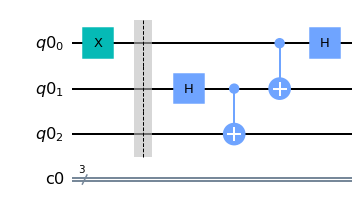

In [6]:
# Make the jump
circuit.cx(qr[0], qr[1])
circuit.h(0)
circuit.draw(output='mpl')

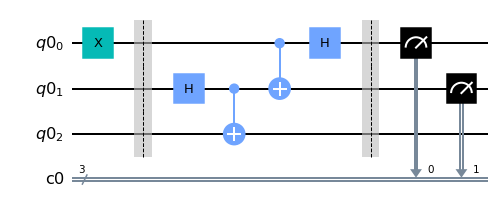

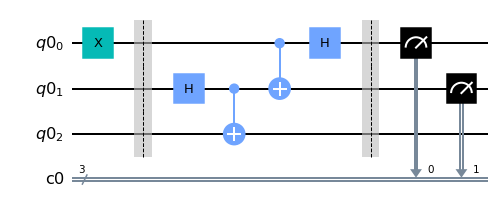

In [7]:
circuit.barrier()
circuit.measure([qr[0], qr[1]], [cr[0], cr[1]])
circuit.draw(output='mpl')

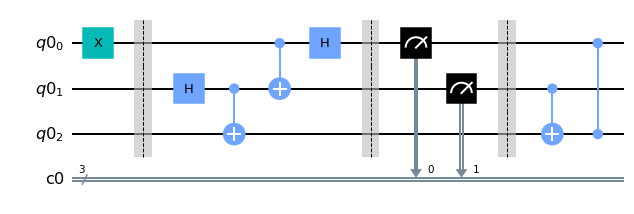

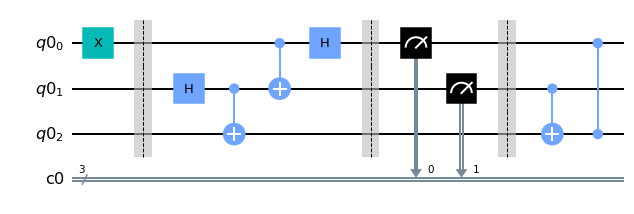

In [8]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

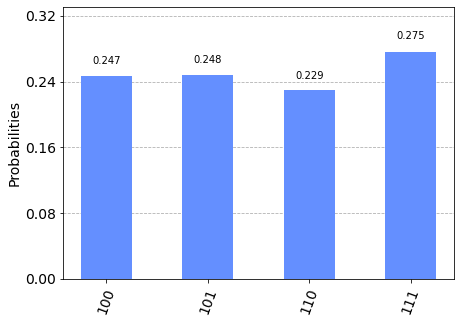

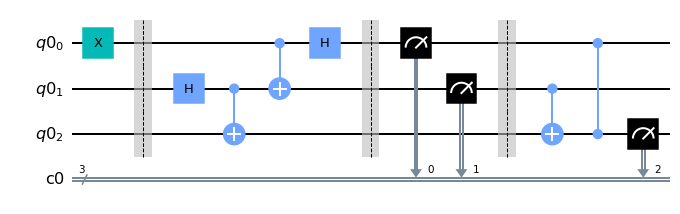

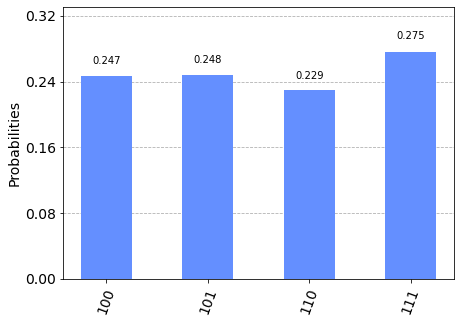

In [9]:
circuit.measure(qr[2], cr[2])
simulator = simulator = Aer.get_backend('qasm_simulator')
result = execute(experiments=circuit, backend=simulator, shots=1024).result()
counts = result.get_counts(circuit)
circuit.draw(output='mpl')
plot_histogram(counts)

Job Status: job has successfully run


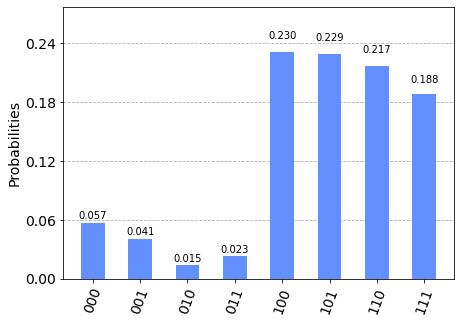

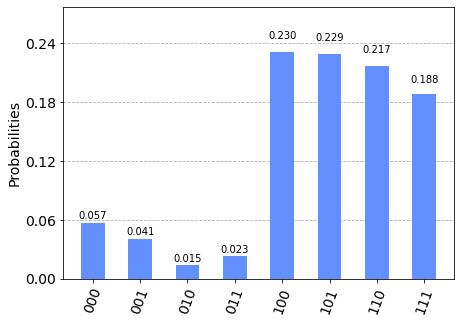

In [10]:
# Execute on quantum computer
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_manila')
# Execute circut on quantum computer
job = execute(experiments=circuit, backend=qcomp, shots=1024)
job_monitor(job)
# Plot result
qresult = job.result()
counts = qresult.get_counts(circuit)
plot_histogram(counts)